In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train_LZdllcl.csv')
test=pd.read_csv('test_2umaH9m.csv')

In [3]:
import re

In [4]:
re.search('^Sales$',train['department'])

TypeError: expected string or bytes-like object

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
combined=pd.concat([train,test],ignore_index=True,sort=False) # we are combining the train and test 
                                                              # with false index and sort false 

In [6]:
combined.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [7]:
combined.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [8]:
combined.age.unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24,
       57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54,
       58, 48, 53, 55, 51, 52, 21], dtype=int64)

In [9]:
education=combined[combined['education'].isnull()]
education

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0.0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0.0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0.0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0.0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0.0
87,69094,Sales & Marketing,region_2,NaN,m,sourcing,1,39,1.0,9,0,0,49,0.0
90,62658,Sales & Marketing,region_2,NaN,f,sourcing,1,20,NaN,1,0,0,55,0.0
189,6254,Operations,region_2,NaN,f,other,1,33,4.0,9,0,0,64,0.0
204,60761,Operations,region_16,NaN,f,other,1,31,4.0,2,0,0,62,0.0
231,57235,Sales & Marketing,region_26,NaN,m,other,1,22,4.0,2,0,0,51,0.0


In [10]:
for i in combined['department'].unique():
    print(combined[(~combined['education'].isnull())&(combined['department']==i)]['education'].value_counts(),i)

Bachelor's          15917
Master's & above     6000
Name: education, dtype: int64 Sales & Marketing
Bachelor's          11079
Master's & above     4466
Below Secondary       249
Name: education, dtype: int64 Operations
Bachelor's          6558
Master's & above    3162
Below Secondary      288
Name: education, dtype: int64 Technology
Bachelor's          5681
Master's & above    1498
Name: education, dtype: int64 Analytics
Bachelor's          769
Master's & above    630
Name: education, dtype: int64 R&D
Bachelor's          6200
Master's & above    3645
Below Secondary      201
Name: education, dtype: int64 Procurement
Bachelor's          2683
Master's & above     739
Below Secondary      155
Name: education, dtype: int64 Finance
Bachelor's          2210
Master's & above    1061
Below Secondary      186
Name: education, dtype: int64 HR
Bachelor's          1150
Master's & above     228
Below Secondary      100
Name: education, dtype: int64 Legal


In [11]:
combined.groupby('education')['department'].value_counts()

education         department       
Bachelor's        Sales & Marketing    15917
                  Operations           11079
                  Technology            6558
                  Procurement           6200
                  Analytics             5681
                  Finance               2683
                  HR                    2210
                  Legal                 1150
                  R&D                    769
Below Secondary   Technology             288
                  Operations             249
                  Procurement            201
                  HR                     186
                  Finance                155
                  Legal                  100
Master's & above  Sales & Marketing     6000
                  Operations            4466
                  Procurement           3645
                  Technology            3162
                  Analytics             1498
                  HR                    1061
                  F

In [12]:
combined[combined['region']=='region_15']['education'].value_counts()

Bachelor's          2752
Master's & above     921
Below Secondary        1
Name: education, dtype: int64

In [ ]:
combined['education'].value_counts(1)*100 # with null values 

In [ ]:
combinedo=combined.copy()

In [15]:
combined['education'].fillna(method='bfill').value_counts(1)*100 # bfill there is not much change 

Bachelor's          69.752740
Master's & above    28.685279
Below Secondary      1.561981
Name: education, dtype: float64

In [16]:
combined['education'].fillna(method='ffill').value_counts(1)*100 # there is not much change

Bachelor's          69.862576
Master's & above    28.567780
Below Secondary      1.569644
Name: education, dtype: float64

In [17]:
combined['education']=combined['education'].fillna(method='ffill') # use forward fill 

In [24]:
combined['is_promoted'].value_counts(1)*100 # total 8.5 % employee were promoted 

0.0    91.482995
1.0     8.517005
Name: is_promoted, dtype: float64

In [25]:
combined['department'].groupby(combined['is_promoted']).value_counts(1)# maximum promotion department is sales operation 
#technology procurement

is_promoted  department       
0.0          Sales & Marketing    0.311667
             Operations           0.205923
             Procurement          0.128640
             Technology           0.127044
             Analytics            0.096530
             Finance              0.046470
             HR                   0.045513
             Legal                0.019665
             R&D                  0.018548
1.0          Sales & Marketing    0.259854
             Operations           0.219152
             Technology           0.164524
             Procurement          0.147386
             Analytics            0.109683
             Finance              0.044130
             HR                   0.029135
             R&D                  0.014781
             Legal                0.011354
Name: department, dtype: float64

In [19]:
combined['is_promoted'].groupby(combined['education'].isnull()).value_counts(1) # from this I found 
# where education is null and 122 employee is promoted so if I use forward or backward not much affect

education  is_promoted
False      0.0            0.91483
           1.0            0.08517
Name: is_promoted, dtype: float64

In [112]:
combined.isnull().mean()*100

employee_id              0.000000
department               0.000000
region                   0.000000
education                0.000000
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.581292
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
dtype: float64

In [91]:
combined['previous_year_rating'].groupby(combined['length_of_service']).unique() # previos rating has null values because these employees no experience

length_of_service
1     [nan, 3.0, 5.0, 1.0, 4.0, 2.0]
2          [3.0, 1.0, 4.0, 2.0, 5.0]
3          [5.0, 3.0, 4.0, 1.0, 2.0]
4          [5.0, 1.0, 3.0, 4.0, 2.0]
5          [3.0, 4.0, 5.0, 1.0, 2.0]
6          [3.0, 4.0, 5.0, 1.0, 2.0]
7          [3.0, 5.0, 4.0, 2.0, 1.0]
8          [5.0, 3.0, 4.0, 1.0, 2.0]
9          [3.0, 1.0, 5.0, 4.0, 2.0]
10         [1.0, 5.0, 3.0, 2.0, 4.0]
11         [4.0, 5.0, 3.0, 1.0, 2.0]
12         [5.0, 3.0, 1.0, 2.0, 4.0]
13         [4.0, 1.0, 3.0, 5.0, 2.0]
14         [3.0, 5.0, 1.0, 2.0, 4.0]
15         [3.0, 4.0, 5.0, 1.0, 2.0]
16         [3.0, 1.0, 4.0, 2.0, 5.0]
17         [4.0, 5.0, 3.0, 2.0, 1.0]
18         [4.0, 3.0, 5.0, 1.0, 2.0]
19         [2.0, 3.0, 5.0, 4.0, 1.0]
20         [5.0, 3.0, 1.0, 2.0, 4.0]
21         [3.0, 1.0, 5.0, 4.0, 2.0]
22         [5.0, 1.0, 3.0, 4.0, 2.0]
23         [4.0, 3.0, 2.0, 5.0, 1.0]
24         [1.0, 3.0, 2.0, 5.0, 4.0]
25         [3.0, 4.0, 2.0, 1.0, 5.0]
26         [4.0, 3.0, 5.0, 1.0, 2.0]
27         [2.0, 5.0

In [113]:
combined[(combined['length_of_service']==1)&(combined['previous_year_rating']==4)] # important to check 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
1734,40259,Analytics,region_7,Bachelor's,m,other,1,29,4.0,1,1,0,84,0.0
2132,11653,Analytics,region_27,Bachelor's,m,sourcing,1,29,4.0,1,1,0,81,1.0
3345,64228,Sales & Marketing,region_24,Bachelor's,m,sourcing,2,28,4.0,1,0,0,54,0.0
4434,66424,Technology,region_2,Bachelor's,f,sourcing,2,23,4.0,1,1,0,81,0.0
4514,7181,Procurement,region_7,Bachelor's,f,sourcing,1,29,4.0,1,1,0,63,0.0
5553,50625,Technology,region_13,Bachelor's,m,sourcing,1,30,4.0,1,0,0,90,1.0
5582,65246,Technology,region_16,Bachelor's,f,other,1,29,4.0,1,1,0,78,1.0
5825,64789,Sales & Marketing,region_13,Bachelor's,m,other,1,23,4.0,1,0,0,48,0.0
5929,44799,Technology,region_2,Bachelor's,m,referred,1,27,4.0,1,0,0,73,0.0
6115,11210,Sales & Marketing,region_2,Master's & above,f,other,1,21,4.0,1,0,0,51,0.0


In [89]:
combined.previous_year_rating.unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [115]:
combined['is_promoted'].value_counts(1)*100 # total promoted # our problem is imbalanced

0.0    91.482995
1.0     8.517005
Name: is_promoted, dtype: float64

In [103]:
combined['is_promoted'].groupby(combined['previous_year_rating'].isnull()).value_counts() 
# inference from this is found that those employees has only one year ,only 339 are promoted
# rating is null only those employee who are fresher

previous_year_rating  is_promoted
False                 0.0            46355
                      1.0             4329
True                  0.0             3785
                      1.0              339
Name: is_promoted, dtype: int64

In [25]:
combined['education'].groupby(combined['previous_year_rating'].isnull()).value_counts()

previous_year_rating  education       
False                 Bachelor's          49560
                      Master's & above    22083
                      Below Secondary       719
True                  Bachelor's           5055
                      Below Secondary       504
                      Master's & above      377
Name: education, dtype: int64

In [80]:
combined['previous_year_rating']=combined['previous_year_rating'].fillna(value=0) # beacause of no experience 

In [81]:
combined.isnull().mean()*100

department               0.000000
education                0.000000
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     0.000000
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
region_promo             0.000000
dtype: float64

In [124]:
combined['employee_id'].unique().shape

(78298,)

In [125]:
combined.drop('employee_id',axis=1,inplace=True) # employee id is not necessary for promotion

In [127]:
combined['is_promoted'].groupby(combined['department']).value_counts()  # department is necessary decide the promotion

department         is_promoted
Analytics          0.0             4840
                   1.0              512
Finance            0.0             2330
                   1.0              206
HR                 0.0             2282
                   1.0              136
Legal              0.0              986
                   1.0               53
Operations         0.0            10325
                   1.0             1023
Procurement        0.0             6450
                   1.0              688
R&D                0.0              930
                   1.0               69
Sales & Marketing  0.0            15627
                   1.0             1213
Technology         0.0             6370
                   1.0              768
Name: is_promoted, dtype: int64

In [26]:
combined.groupby('is_promoted')['region'].value_counts()[1] # promtion by region

region
region_2     989
region_22    734
region_7     516
region_4     246
region_13    230
region_15    222
region_28    154
region_26    143
region_23    137
region_27    131
region_31    110
region_17    109
region_25    103
region_16    102
region_11     74
region_14     62
region_30     59
region_1      58
region_19     53
region_8      53
region_10     51
region_20     49
region_29     43
region_32     40
region_3      37
region_5      35
region_12     33
region_6      32
region_21     18
region_24     18
region_33     10
region_34      8
region_9       8
region_18      1
Name: region, dtype: int64

In [27]:
high_promo_reg=['region_2','region_22','region_7','region_4','region_13','region_15','region_28','region_26','region_23',    
'region_27','region_31','region_17','region_25','region_16' ]   
med_promo_reg=['region_11','region_14','region_30','region_1','region_19','region_8','region_10','region_20','region_29','region_32','region_3'      
'region_5','region_12','region_6']
low_promo_reg=['region_21','region_24','region_33','region_34','region_9','region_18']


In [28]:
def reg(x):
    if x in high_promo_reg:
        return('high_promo_reg')
    if x in med_promo_reg:
        return('med_promo_reg')
    else:
        return('low_promo_reg')

In [29]:
combined['region_promo']=combined['region'].apply(reg)

In [30]:
combined['region_promo'].value_counts()

high_promo_reg    60256
med_promo_reg     13631
low_promo_reg      4411
Name: region_promo, dtype: int64

In [33]:
combined['is_promoted'].groupby(combined['region_promo']).value_counts(1)*100

region_promo    is_promoted
high_promo_reg  0.0            90.696682
                1.0             9.303318
low_promo_reg   0.0            95.563589
                1.0             4.436411
med_promo_reg   0.0            93.653947
                1.0             6.346053
Name: is_promoted, dtype: float64

In [39]:
combined['region_promo']=combined['region_promo'].map({'high_promo_reg':2,'low_promo_reg':0,'med_promo_reg':1})

In [35]:
combined.drop('region',axis=1,inplace=True)

In [155]:
combined.groupby('gender')['is_promoted'].value_counts()

gender  is_promoted
f       0.0            14845
        1.0             1467
m       0.0            35295
        1.0             3201
Name: is_promoted, dtype: int64

C:\Users\Ajay singh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ajay singh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


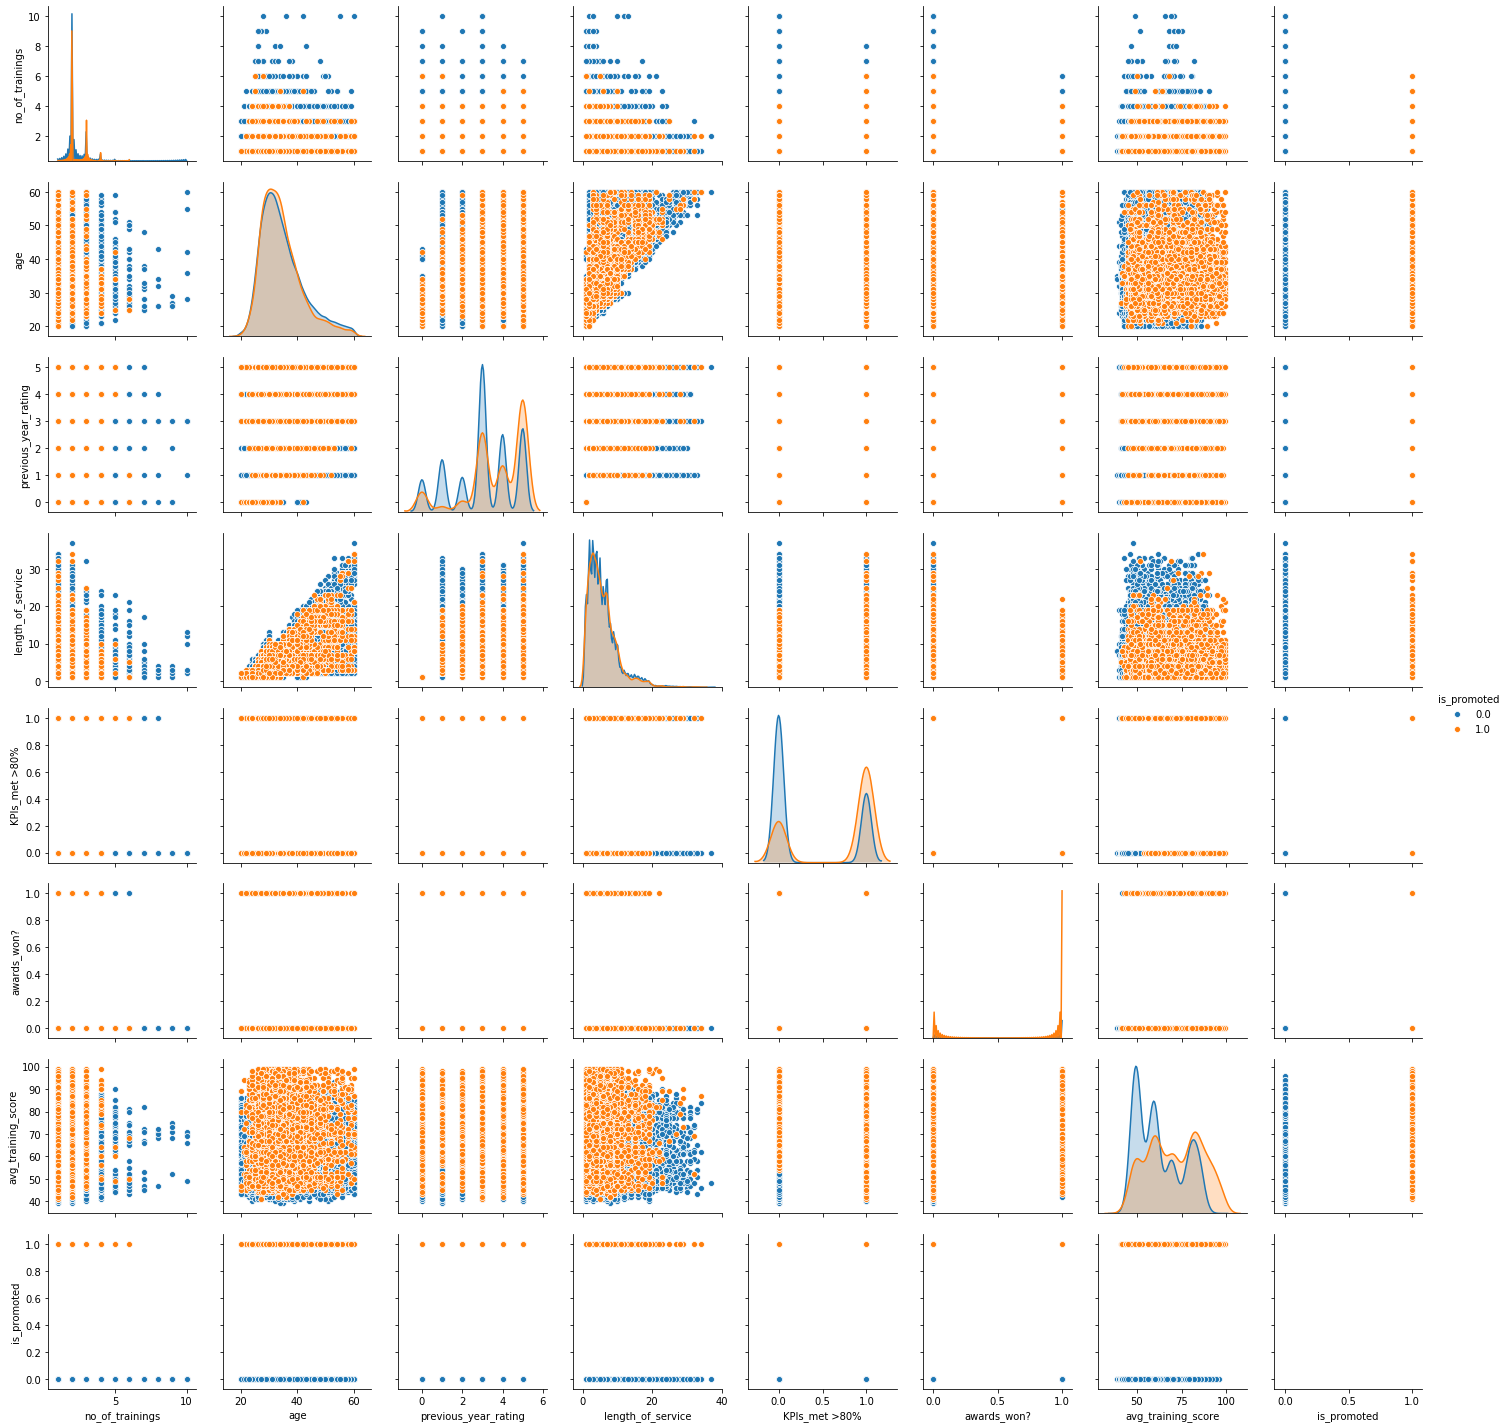

In [151]:
sns.pairplot(combined,hue='is_promoted')

In [152]:
# from the result I found if I use knn is base model it work good than logistic

In [45]:
combined.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_promo
0,Sales & Marketing,2,f,sourcing,1,35,5.0,8,1,0,49,0.0,2
1,Operations,1,m,other,1,30,5.0,4,0,0,60,0.0,2
2,Sales & Marketing,1,m,sourcing,1,34,3.0,7,0,0,50,0.0,1
3,Sales & Marketing,1,m,other,2,39,1.0,10,0,0,50,0.0,2
4,Technology,1,m,other,1,45,3.0,2,0,0,73,0.0,2


In [44]:
combined['education']=combined['education'].map({"Master's & above":2, "Bachelor's":1,'Below Secondary':0})

In [41]:
combined.drop(columns='employee_id',axis=1,inplace=True) # it making complex so we drop

In [156]:
combined.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,1.253378,34.797619,3.079593,5.848974,0.354032,0.023053,63.349664,0.085170
std,0.606766,7.665928,1.499173,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [157]:
combined.skew() # data is not much skew 

no_of_trainings         3.403109
age                     1.008714
previous_year_rating   -0.495361
length_of_service       1.728033
KPIs_met >80%           0.610477
awards_won?             6.356378
avg_training_score      0.453727
is_promoted             2.972339
dtype: float64

In [86]:
# convert categorical to numerical using one hot encoding the data 
dummydata=pd.get_dummies(columns=['department','gender','recruitment_channel'],data=combined,drop_first=True)

In [87]:
dummydata.shape

(78298, 21)

In [88]:
dummydata.isnull().sum()

education                           0
no_of_trainings                     0
age                                 0
previous_year_rating                0
length_of_service                   0
KPIs_met >80%                       0
awards_won?                         0
avg_training_score                  0
is_promoted                     23490
region_promo                        0
department_Finance                  0
department_HR                       0
department_Legal                    0
department_Operations               0
department_Procurement              0
department_R&D                      0
department_Sales & Marketing        0
department_Technology               0
gender_m                            0
recruitment_channel_referred        0
recruitment_channel_sourcing        0
dtype: int64

# making model without balanced the data

In [89]:
# our data is not same scale we have to make same scale 
train1=dummydata[~dummydata['is_promoted'].isnull()]
test1=dummydata[dummydata['is_promoted'].isnull()]

In [90]:
test1.drop('is_promoted',axis=1,inplace=True)

C:\Users\Ajay singh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [91]:
train1.shape,test1.shape

((54808, 21), (23490, 20))

In [92]:
train.shape,test.shape # original

((54808, 14), (23490, 13))

In [93]:
# normalize the data 
from sklearn.preprocessing import StandardScaler

In [94]:
ms=StandardScaler()

In [95]:
ytrue=train1['is_promoted']

In [96]:
scaleXtrain=ms.fit_transform(train1.drop('is_promoted',axis=1))
scaleXtest=ms.transform(test1)


In [97]:
new_Xtrain=pd.DataFrame(scaleXtrain,columns=train1.drop('is_promoted',axis=1).columns)

In [98]:
new_Xtest=pd.DataFrame(scaleXtest,columns=test1.columns) # now our data is normalize 

In [99]:
from sklearn.linear_model import LogisticRegression

In [114]:
lr=LogisticRegression(penalty='l2',C=1000)

In [115]:
lrmodel=lr.fit(new_Xtrain,ytrue)
y_lr=lr.predict(new_Xtest)

In [116]:
pd.DataFrame(y_lr,columns=['is_promoted']).to_csv('1000logisticmodelhr.csv',index=False) # 37.4

In [117]:
cd

C:\Users\Ajay singh


knn model

In [210]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
knn=KNeighborsClassifier(n_neighbors=3)

In [212]:
knnmodel=knn.fit(new_train,ytrue)
y_knn=knn.predict(new_test)

In [213]:
pd.DataFrame(y_knn,columns=['is_promoted']).to_csv('knnmodelhr.csv',index=False) # 29

In [214]:
cd

C:\Users\Ajay singh


Random forest 

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [216]:
rfmodel=rf.fit(new_train,ytrue)
y_rf=rf.predict(new_test)

In [219]:
pd.DataFrame(y_knn,columns=['is_promoted']).to_csv('rfmodelhr.csv',index=False) # 29

In [220]:
cd

C:\Users\Ajay singh


boosting 

In [225]:
from sklearn.ensemble import GradientBoostingClassifier

In [226]:
gb=GradientBoostingClassifier()

In [227]:
gbmodel=gb.fit(new_train,ytrue)
y_gb=gb.predict(new_test)

In [228]:
pd.DataFrame(y_gb,columns=['is_promoted']).to_csv('gbmodelhr.csv',index=False) # 44

In [229]:
cd

C:\Users\Ajay singh


SMOT apply because data is imbalance

In [118]:
!pip install imblearn

In [119]:
from imblearn.combine import SMOTETomek 
smt=SMOTETomek()

In [120]:
x_reset,y_reset=smt.fit_sample(new_Xtrain,ytrue)

In [121]:
ytrue.value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

In [122]:
y_reset.value_counts() # after balancing the class of both promoted or not promted

1.0    49487
0.0    49487
Name: is_promoted, dtype: int64

After balancing the dataset

knn

In [235]:
knn=KNeighborsClassifier()
knnsmot=knn.fit(x_reset,y_reset)
y_knnsmot=knn.predict(new_test)

In [236]:
pd.DataFrame(y_knnsmot,columns=['is_promoted']).to_csv('knnsmotmodelhr.csv',index=False) # 35.10

In [237]:
cd

C:\Users\Ajay singh


###random forest

In [128]:
rf=RandomForestClassifier(n_estimators=500,criterion='entropy')
rfsmot=rf.fit(x_reset,y_reset)
y_rfsmot=rf.predict(new_Xtest)

In [131]:
rf.score(x_reset,y_reset)

0.9985753834340332

In [129]:
pd.DataFrame(y_rfsmot,columns=['is_promoted']).to_csv('randomforest.csv',index=False) # 45.79

In [130]:
cd

C:\Users\Ajay singh


Gradient boosting

In [251]:
gb=GradientBoostingClassifier(n_estimators=500,learning_rate=0.2)

In [252]:
gb=RandomForestClassifier()
gbsmot=gb.fit(x_reset,y_reset)
y_gbsmot=gb.predict(new_test)

In [253]:
pd.DataFrame(y_gbsmot,columns=['is_promoted']).to_csv('gbsmotmodeltune.csv',index=False) # 45.76

In [254]:
cd

C:\Users\Ajay singh


In [138]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(base_estimator=rf)

In [139]:
bcodel=bc.fit(x_reset,y_reset)
y_bc=bc.predict(new_Xtest)

In [140]:
pd.DataFrame(y_bc,columns=['is_promoted']).to_csv('baggingrandomforest.csv',index=False) # 45.76

In [141]:
cd

C:\Users\Ajay singh


Take new approch 

In [256]:
# use feature selection by statistics

In [149]:
dummydata.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_promo,...,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,2,1,35,5.0,8,1,0,49,0.0,2,...,0,0,0,0,0,1,0,0,0,1
1,1,1,30,5.0,4,0,0,60,0.0,2,...,0,0,1,0,0,0,0,1,0,0
2,1,1,34,3.0,7,0,0,50,0.0,1,...,0,0,0,0,0,1,0,1,0,1
3,1,2,39,1.0,10,0,0,50,0.0,2,...,0,0,0,0,0,1,0,1,0,0
4,1,1,45,3.0,2,0,0,73,0.0,2,...,0,0,0,0,0,0,1,1,0,0


In [142]:
from sklearn.feature_selection import RFE

In [166]:
rfe=RFE(estimator=lr,n_features_to_select=10)

In [167]:
selct=rfe.fit(x_reset,y_reset)

In [168]:
selct.get_support

<bound method SelectorMixin.get_support of RFE(estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)>

In [169]:
selct.ranking_

array([ 7,  5,  3,  2,  6,  1,  4,  1,  1,  1,  1,  1,  1,  1,  8,  1,  1,
       11, 10,  9])

In [170]:
x_reset.columns

Index(['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'region_promo', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing'],
      dtype='object')

In [171]:
newx_reset=x_reset[['KPIs_met >80%',
       'avg_training_score', 'region_promo', 'department_Finance',
       'department_HR', 'department_Legal','department_Sales & Marketing', 'department_Technology','department_R&D',
       'department_Sales & Marketing']]
new_newXtest=new_Xtest[['KPIs_met >80%',
       'avg_training_score', 'region_promo', 'department_Finance',
       'department_HR', 'department_Legal','department_Sales & Marketing', 'department_Technology','department_R&D',
       'department_Sales & Marketing']]

In [172]:
rf=RandomForestClassifier()
rfsmot=rf.fit(newx_reset,y_reset)
y_new=rf.predict(new_newXtest)

In [174]:
pd.DataFrame(y_new,columns=['is_promoted']).to_csv('rfe2randomforest.csv',index=False) # 36

In [175]:
cd

C:\Users\Ajay singh


RFE is not work better so